In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns

import plotly.express as px # https://plotly.com/python/
import matplotlib.pyplot as plt

import altair as alt

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/16-bnsDdmmgtSxdWbVMboIHo5FRuz76DBxsz_BbsEVWA/export?format=csv&id=16-bnsDdmmgtSxdWbVMboIHo5FRuz76DBxsz_BbsEVWA&gid=0'
df_historico = pd.read_csv(url)
df_historico

fecha  dia_inicio  ...     observacion covid19argentina_admin_level_4
0     2/03/2020           1  ...  no hay informe                capital-federal
1     3/03/2020           2  ...  no hay informe                        no-data
2     4/03/2020           3  ...  no hay informe                        no-data
3     5/03/2020           4  ...             NaN                   buenos-aires
4     6/03/2020           5  ...             NaN                        no-data
...         ...         ...  ...             ...                            ...
1962  8/07/2020         126  ...             NaN                            NaN
1963  8/07/2020         126  ...             NaN                            NaN
1964  8/07/2020         126  ...             NaN                            NaN
1965  8/07/2020         126  ...             NaN                            NaN
1966  8/07/2020         126  ...             NaN                            NaN

[1967 rows x 19 columns]

In [ ]:
df_historico.fillna(0)

fecha  dia_inicio  ...     observacion covid19argentina_admin_level_4
0     2/03/2020           1  ...  no hay informe                capital-federal
1     3/03/2020           2  ...  no hay informe                        no-data
2     4/03/2020           3  ...  no hay informe                        no-data
3     5/03/2020           4  ...               0                   buenos-aires
4     6/03/2020           5  ...               0                        no-data
...         ...         ...  ...             ...                            ...
1962  8/07/2020         126  ...               0                              0
1963  8/07/2020         126  ...               0                              0
1964  8/07/2020         126  ...               0                              0
1965  8/07/2020         126  ...               0                              0
1966  8/07/2020         126  ...               0                              0

[1967 rows x 19 columns]

In [ ]:
df_historico = df_historico[['fecha','osm_admin_level_4','nue_casosconf_diff','nue_fallecidos_diff']]
df_historico.head()

fecha osm_admin_level_4  nue_casosconf_diff  nue_fallecidos_diff
0  2/03/2020              CABA                 1.0                    0
1  3/03/2020     Indeterminado                 0.0                    0
2  4/03/2020     Indeterminado                 0.0                    0
3  5/03/2020      Buenos Aires                 1.0                    2
4  6/03/2020     Indeterminado                 0.0                    0

In [ ]:
# Deleting Indeterminate and NA (sure indeterminado is not transformed in NA?)
df_historico.drop(df_historico[df_historico.osm_admin_level_4 == 'Indeterminado'].index, inplace=True)
df_historico.drop(df_historico[df_historico.osm_admin_level_4.isna()].index, inplace=True)
df_historico

fecha    osm_admin_level_4  nue_casosconf_diff  nue_fallecidos_diff
0     2/03/2020                 CABA                 1.0                    0
3     5/03/2020         Buenos Aires                 1.0                    2
6     8/03/2020         Buenos Aires                 8.0                    0
7     9/03/2020                 CABA                 1.0                    1
8     9/03/2020             San Luis                 2.0                    0
...         ...                  ...                 ...                  ...
1961  8/07/2020           Santa Cruz                 0.0                    0
1962  8/07/2020             Santa Fe                14.0                    0
1963  8/07/2020  Santiago del Estero                 8.0                    0
1964  8/07/2020     Tierra del Fuego                 0.0                    0
1965  8/07/2020              Tucumán                 1.0                    0

[1848 rows x 4 columns]

In [ ]:
df_historico.fecha = pd.to_datetime(df_historico.fecha.astype(str), format='%d/%m/%Y')

In [ ]:
df_historico.rename(columns={
    'fecha':'index',
    'osm_admin_level_4':'Province/State'
}, inplace=True)

In [ ]:
df_historico.head()

index Province/State  nue_casosconf_diff  nue_fallecidos_diff
0 2020-03-02           CABA                 1.0                    0
3 2020-03-05   Buenos Aires                 1.0                    2
6 2020-03-08   Buenos Aires                 8.0                    0
7 2020-03-09           CABA                 1.0                    1
8 2020-03-09       San Luis                 2.0                    0

In [ ]:
df_historico.sort_values(by=['Province/State', 'index'], ascending=True)

index Province/State  nue_casosconf_diff  nue_fallecidos_diff
3    2020-03-05   Buenos Aires                 1.0                    2
6    2020-03-08   Buenos Aires                 8.0                    0
11   2020-03-10   Buenos Aires                 1.0                    0
13   2020-03-11   Buenos Aires                 1.0                    0
16   2020-03-13   Buenos Aires                 1.0                    0
...         ...            ...                 ...                  ...
1865 2020-07-04        Tucumán                 1.0                    0
1890 2020-07-05        Tucumán                 3.0                    0
1915 2020-07-06        Tucumán                 0.0                    0
1940 2020-07-07        Tucumán                 0.0                    0
1965 2020-07-08        Tucumán                 1.0                    0

[1848 rows x 4 columns]

In [ ]:
df_historico

index       Province/State  nue_casosconf_diff  nue_fallecidos_diff
0    2020-03-02                 CABA                 1.0                    0
3    2020-03-05         Buenos Aires                 1.0                    2
6    2020-03-08         Buenos Aires                 8.0                    0
7    2020-03-09                 CABA                 1.0                    1
8    2020-03-09             San Luis                 2.0                    0
...         ...                  ...                 ...                  ...
1961 2020-07-08           Santa Cruz                 0.0                    0
1962 2020-07-08             Santa Fe                14.0                    0
1963 2020-07-08  Santiago del Estero                 8.0                    0
1964 2020-07-08     Tierra del Fuego                 0.0                    0
1965 2020-07-08              Tucumán                 1.0                    0

[1848 rows x 4 columns]

In [ ]:
df_deaths = df_historico[['index','Province/State','nue_fallecidos_diff']]
df_confirmed = df_historico[['index','Province/State','nue_casosconf_diff']]

In [ ]:
df_deaths.head()

index Province/State  nue_fallecidos_diff
0 2020-03-02           CABA                    0
3 2020-03-05   Buenos Aires                    2
6 2020-03-08   Buenos Aires                    0
7 2020-03-09           CABA                    1
8 2020-03-09       San Luis                    0

In [ ]:
df_confirmed.head(20)

index    Province/State  nue_casosconf_diff
0  2020-03-02              CABA                 1.0
3  2020-03-05      Buenos Aires                 1.0
6  2020-03-08      Buenos Aires                 8.0
7  2020-03-09              CABA                 1.0
8  2020-03-09          San Luis                 2.0
9  2020-03-09             Chaco                 5.0
10 2020-03-09         Río Negro                 1.0
11 2020-03-10      Buenos Aires                 1.0
12 2020-03-10              CABA                 1.0
13 2020-03-11      Buenos Aires                 1.0
14 2020-03-11              CABA                 1.0
15 2020-03-12              CABA                10.0
16 2020-03-13      Buenos Aires                 1.0
17 2020-03-13              CABA                 2.0
18 2020-03-14              CABA                11.0
19 2020-03-14          Santa Fe                 1.0
20 2020-03-15              CABA                 6.0
21 2020-03-15             Chaco                 4.0
22 2020-03-15  Tierra del Fuego                 1.0
23 2020-03-15      Buenos Aires                 1.0

In [ ]:
df_confirmed

index       Province/State  nue_casosconf_diff
0    2020-03-02                 CABA                 1.0
3    2020-03-05         Buenos Aires                 1.0
6    2020-03-08         Buenos Aires                 8.0
7    2020-03-09                 CABA                 1.0
8    2020-03-09             San Luis                 2.0
...         ...                  ...                 ...
1961 2020-07-08           Santa Cruz                 0.0
1962 2020-07-08             Santa Fe                14.0
1963 2020-07-08  Santiago del Estero                 8.0
1964 2020-07-08     Tierra del Fuego                 0.0
1965 2020-07-08              Tucumán                 1.0

[1848 rows x 3 columns]

In [ ]:
df_confirmed['index'] = df_confirmed["index"].dt.strftime('%-m/%-d/%y')
df_deaths['index'] = df_deaths["index"].dt.strftime('%-m/%-d/%y')

In [ ]:
df_deaths.head()

index Province/State  nue_fallecidos_diff
0  3/2/20           CABA                    0
3  3/5/20   Buenos Aires                    2
6  3/8/20   Buenos Aires                    0
7  3/9/20           CABA                    1
8  3/9/20       San Luis                    0

In [ ]:
df_confirmed.groupby(['index','Province/State'])['nue_casosconf_diff'].sum().reset_index()

index       Province/State  nue_casosconf_diff
0     3/10/20         Buenos Aires                 1.0
1     3/10/20                 CABA                 1.0
2     3/11/20         Buenos Aires                 1.0
3     3/11/20                 CABA                 1.0
4     3/12/20                 CABA                10.0
...       ...                  ...                 ...
1708   7/8/20           Santa Cruz                 0.0
1709   7/8/20             Santa Fe                14.0
1710   7/8/20  Santiago del Estero                 8.0
1711   7/8/20     Tierra del Fuego                 0.0
1712   7/8/20              Tucumán                 1.0

[1713 rows x 3 columns]

In [ ]:
df_confirmed

index       Province/State  nue_casosconf_diff
0     3/2/20                 CABA                 1.0
3     3/5/20         Buenos Aires                 1.0
6     3/8/20         Buenos Aires                 8.0
7     3/9/20                 CABA                 1.0
8     3/9/20             San Luis                 2.0
...      ...                  ...                 ...
1961  7/8/20           Santa Cruz                 0.0
1962  7/8/20             Santa Fe                14.0
1963  7/8/20  Santiago del Estero                 8.0
1964  7/8/20     Tierra del Fuego                 0.0
1965  7/8/20              Tucumán                 1.0

[1848 rows x 3 columns]

In [ ]:
df_confirmed_pivot = pd.pivot_table(df_confirmed, values='nue_casosconf_diff', index=['Province/State'], columns='index', aggfunc=np.sum).fillna(0)
df_confirmed_pivot

index                3/10/20  3/11/20  3/12/20  ...  7/6/20  7/7/20  7/8/20
Province/State                                  ...                        
Buenos Aires             1.0      1.0      0.0  ...  1476.0  1752.0  2222.0
CABA                     1.0      1.0     10.0  ...   995.0  1025.0  1116.0
Catamarca                0.0      0.0      0.0  ...     1.0     0.0    21.0
Chaco                    0.0      0.0      0.0  ...    26.0    22.0    59.0
Chubut                   0.0      0.0      0.0  ...     6.0     0.0    13.0
Corrientes               0.0      0.0      0.0  ...     1.0     1.0     4.0
Córdoba                  0.0      0.0      0.0  ...    28.0    48.0    21.0
Entre Ríos               0.0      0.0      0.0  ...     5.0    10.0    11.0
Formosa                  0.0      0.0      0.0  ...     0.0     0.0     0.0
Jujuy                    0.0      0.0      0.0  ...    29.0    30.0    38.0
La Pampa                 0.0      0.0      0.0  ...     0.0     0.0     0.0
La Rioja                 0.0      0.0      0.0  ...     5.0     3.0    14.0
Mendoza                  0.0      0.0      0.0  ...     4.0    23.0    22.0
Misiones                 0.0      0.0      0.0  ...     2.0     0.0     0.0
Neuquén                  0.0      0.0      0.0  ...    34.0    22.0    23.0
Río Negro                0.0      0.0      0.0  ...     7.0    25.0    11.0
Salta                    0.0      0.0      0.0  ...     2.0     8.0     6.0
San Juan                 0.0      0.0      0.0  ...     1.0     0.0     0.0
San Luis                 0.0      0.0      0.0  ...     0.0     0.0     0.0
Santa Cruz               0.0      0.0      0.0  ...     4.0     0.0     0.0
Santa Fe                 0.0      0.0      0.0  ...     5.0     9.0    14.0
Santiago del Estero      0.0      0.0      0.0  ...     1.0     1.0     8.0
Tierra del Fuego         0.0      0.0      0.0  ...     0.0     0.0     0.0
Tucumán                  0.0      0.0      0.0  ...     0.0     0.0     1.0

[24 rows x 125 columns]

In [ ]:
df_deaths_pivot = pd.pivot_table(df_deaths, values='nue_fallecidos_diff', index=['Province/State'], columns='index', aggfunc=np.sum).fillna(0)

In [ ]:
df_confirmed_pivot

index                3/10/20  3/11/20  3/12/20  ...  7/6/20  7/7/20  7/8/20
Province/State                                  ...                        
Buenos Aires             1.0      1.0      0.0  ...  1476.0  1752.0  2222.0
CABA                     1.0      1.0     10.0  ...   995.0  1025.0  1116.0
Catamarca                0.0      0.0      0.0  ...     1.0     0.0    21.0
Chaco                    0.0      0.0      0.0  ...    26.0    22.0    59.0
Chubut                   0.0      0.0      0.0  ...     6.0     0.0    13.0
Corrientes               0.0      0.0      0.0  ...     1.0     1.0     4.0
Córdoba                  0.0      0.0      0.0  ...    28.0    48.0    21.0
Entre Ríos               0.0      0.0      0.0  ...     5.0    10.0    11.0
Formosa                  0.0      0.0      0.0  ...     0.0     0.0     0.0
Jujuy                    0.0      0.0      0.0  ...    29.0    30.0    38.0
La Pampa                 0.0      0.0      0.0  ...     0.0     0.0     0.0
La Rioja                 0.0      0.0      0.0  ...     5.0     3.0    14.0
Mendoza                  0.0      0.0      0.0  ...     4.0    23.0    22.0
Misiones                 0.0      0.0      0.0  ...     2.0     0.0     0.0
Neuquén                  0.0      0.0      0.0  ...    34.0    22.0    23.0
Río Negro                0.0      0.0      0.0  ...     7.0    25.0    11.0
Salta                    0.0      0.0      0.0  ...     2.0     8.0     6.0
San Juan                 0.0      0.0      0.0  ...     1.0     0.0     0.0
San Luis                 0.0      0.0      0.0  ...     0.0     0.0     0.0
Santa Cruz               0.0      0.0      0.0  ...     4.0     0.0     0.0
Santa Fe                 0.0      0.0      0.0  ...     5.0     9.0    14.0
Santiago del Estero      0.0      0.0      0.0  ...     1.0     1.0     8.0
Tierra del Fuego         0.0      0.0      0.0  ...     0.0     0.0     0.0
Tucumán                  0.0      0.0      0.0  ...     0.0     0.0     1.0

[24 rows x 125 columns]

In [ ]:
df_deaths_pivot

index                3/10/20  3/11/20  3/12/20  ...  7/6/20  7/7/20  7/8/20
Province/State                                  ...                        
Buenos Aires             0.0      0.0      0.0  ...    54.0    39.0    35.0
CABA                     1.0      0.0      0.0  ...    14.0    21.0    16.0
Catamarca                0.0      0.0      0.0  ...     0.0     0.0     0.0
Chaco                    0.0      0.0      0.0  ...     2.0     0.0     0.0
Chubut                   0.0      0.0      0.0  ...     0.0     0.0     0.0
Corrientes               0.0      0.0      0.0  ...     0.0     0.0     0.0
Córdoba                  0.0      0.0      0.0  ...     0.0     0.0     0.0
Entre Ríos               0.0      0.0      0.0  ...     0.0     0.0     0.0
Formosa                  0.0      0.0      0.0  ...     0.0     0.0     0.0
Jujuy                    0.0      0.0      0.0  ...     0.0     0.0     0.0
La Pampa                 0.0      0.0      0.0  ...     0.0     0.0     0.0
La Rioja                 0.0      0.0      0.0  ...     0.0     0.0     0.0
Mendoza                  0.0      0.0      0.0  ...     0.0     0.0     0.0
Misiones                 0.0      0.0      0.0  ...     0.0     0.0     0.0
Neuquén                  0.0      0.0      0.0  ...     1.0     0.0     0.0
Río Negro                0.0      0.0      0.0  ...     3.0     1.0     0.0
Salta                    0.0      0.0      0.0  ...     0.0     0.0     0.0
San Juan                 0.0      0.0      0.0  ...     1.0     0.0     0.0
San Luis                 0.0      0.0      0.0  ...     0.0     0.0     0.0
Santa Cruz               0.0      0.0      0.0  ...     0.0     0.0     0.0
Santa Fe                 0.0      0.0      0.0  ...     0.0     0.0     0.0
Santiago del Estero      0.0      0.0      0.0  ...     0.0     0.0     0.0
Tierra del Fuego         0.0      0.0      0.0  ...     0.0     0.0     0.0
Tucumán                  0.0      0.0      0.0  ...     0.0     0.0     0.0

[24 rows x 125 columns]

In [ ]:
df_confirmed_pivot.insert(0, 'Country/Region', 'Argentina')
df_deaths_pivot.insert(0, 'Country/Region', 'Argentina')

In [ ]:
df_confirmed_pivot.head() # It is not sequentially ordered

index          Country/Region  3/10/20  3/11/20  ...  7/6/20  7/7/20  7/8/20
Province/State                                   ...                        
Buenos Aires        Argentina      1.0      1.0  ...  1476.0  1752.0  2222.0
CABA                Argentina      1.0      1.0  ...   995.0  1025.0  1116.0
Catamarca           Argentina      0.0      0.0  ...     1.0     0.0    21.0
Chaco               Argentina      0.0      0.0  ...    26.0    22.0    59.0
Chubut              Argentina      0.0      0.0  ...     6.0     0.0    13.0

[5 rows x 126 columns]

In [ ]:
df_confirmed_pivot = df_confirmed_pivot.reset_index()
df_deaths_pivot = df_deaths_pivot.reset_index()

In [ ]:
df_confirmed_pivot

index       Province/State Country/Region  3/10/20  ...  7/6/20  7/7/20  7/8/20
0             Buenos Aires      Argentina      1.0  ...  1476.0  1752.0  2222.0
1                     CABA      Argentina      1.0  ...   995.0  1025.0  1116.0
2                Catamarca      Argentina      0.0  ...     1.0     0.0    21.0
3                    Chaco      Argentina      0.0  ...    26.0    22.0    59.0
4                   Chubut      Argentina      0.0  ...     6.0     0.0    13.0
5               Corrientes      Argentina      0.0  ...     1.0     1.0     4.0
6                  Córdoba      Argentina      0.0  ...    28.0    48.0    21.0
7               Entre Ríos      Argentina      0.0  ...     5.0    10.0    11.0
8                  Formosa      Argentina      0.0  ...     0.0     0.0     0.0
9                    Jujuy      Argentina      0.0  ...    29.0    30.0    38.0
10                La Pampa      Argentina      0.0  ...     0.0     0.0     0.0
11                La Rioja      Argentina      0.0  ...     5.0     3.0    14.0
12                 Mendoza      Argentina      0.0  ...     4.0    23.0    22.0
13                Misiones      Argentina      0.0  ...     2.0     0.0     0.0
14                 Neuquén      Argentina      0.0  ...    34.0    22.0    23.0
15               Río Negro      Argentina      0.0  ...     7.0    25.0    11.0
16                   Salta      Argentina      0.0  ...     2.0     8.0     6.0
17                San Juan      Argentina      0.0  ...     1.0     0.0     0.0
18                San Luis      Argentina      0.0  ...     0.0     0.0     0.0
19              Santa Cruz      Argentina      0.0  ...     4.0     0.0     0.0
20                Santa Fe      Argentina      0.0  ...     5.0     9.0    14.0
21     Santiago del Estero      Argentina      0.0  ...     1.0     1.0     8.0
22        Tierra del Fuego      Argentina      0.0  ...     0.0     0.0     0.0
23                 Tucumán      Argentina      0.0  ...     0.0     0.0     1.0

[24 rows x 127 columns]

In [ ]:
df_deaths_pivot

index       Province/State Country/Region  3/10/20  ...  7/6/20  7/7/20  7/8/20
0             Buenos Aires      Argentina      0.0  ...    54.0    39.0    35.0
1                     CABA      Argentina      1.0  ...    14.0    21.0    16.0
2                Catamarca      Argentina      0.0  ...     0.0     0.0     0.0
3                    Chaco      Argentina      0.0  ...     2.0     0.0     0.0
4                   Chubut      Argentina      0.0  ...     0.0     0.0     0.0
5               Corrientes      Argentina      0.0  ...     0.0     0.0     0.0
6                  Córdoba      Argentina      0.0  ...     0.0     0.0     0.0
7               Entre Ríos      Argentina      0.0  ...     0.0     0.0     0.0
8                  Formosa      Argentina      0.0  ...     0.0     0.0     0.0
9                    Jujuy      Argentina      0.0  ...     0.0     0.0     0.0
10                La Pampa      Argentina      0.0  ...     0.0     0.0     0.0
11                La Rioja      Argentina      0.0  ...     0.0     0.0     0.0
12                 Mendoza      Argentina      0.0  ...     0.0     0.0     0.0
13                Misiones      Argentina      0.0  ...     0.0     0.0     0.0
14                 Neuquén      Argentina      0.0  ...     1.0     0.0     0.0
15               Río Negro      Argentina      0.0  ...     3.0     1.0     0.0
16                   Salta      Argentina      0.0  ...     0.0     0.0     0.0
17                San Juan      Argentina      0.0  ...     1.0     0.0     0.0
18                San Luis      Argentina      0.0  ...     0.0     0.0     0.0
19              Santa Cruz      Argentina      0.0  ...     0.0     0.0     0.0
20                Santa Fe      Argentina      0.0  ...     0.0     0.0     0.0
21     Santiago del Estero      Argentina      0.0  ...     0.0     0.0     0.0
22        Tierra del Fuego      Argentina      0.0  ...     0.0     0.0     0.0
23                 Tucumán      Argentina      0.0  ...     0.0     0.0     0.0

[24 rows x 127 columns]

In [ ]:
for r in range(0,len(df_confirmed_pivot)):
    for c in range(3,len(df_confirmed_pivot.columns)):
        df_confirmed_pivot.iloc[r,c] = df_confirmed_pivot.iloc[r,c - 1] + df_confirmed_pivot.iloc[r,c]

In [ ]:
for r in range(0,len(df_deaths_pivot)):
    for c in range(3,len(df_deaths_pivot.columns)):
        df_deaths_pivot.iloc[r,c] = df_deaths_pivot.iloc[r,c - 1] + df_deaths_pivot.iloc[r,c]

In [ ]:
df_confirmed_pivot

index       Province/State Country/Region  3/10/20  ...   7/6/20   7/7/20   7/8/20
0             Buenos Aires      Argentina      1.0  ...  41450.0  43202.0  45424.0
1                     CABA      Argentina      1.0  ...  32280.0  33305.0  34421.0
2                Catamarca      Argentina      0.0  ...      7.0      7.0     28.0
3                    Chaco      Argentina      0.0  ...   2335.0   2357.0   2416.0
4                   Chubut      Argentina      0.0  ...    160.0    160.0    173.0
5               Corrientes      Argentina      0.0  ...    120.0    121.0    125.0
6                  Córdoba      Argentina      0.0  ...    730.0    778.0    799.0
7               Entre Ríos      Argentina      0.0  ...    334.0    344.0    355.0
8                  Formosa      Argentina      0.0  ...     75.0     75.0     75.0
9                    Jujuy      Argentina      0.0  ...    192.0    222.0    260.0
10                La Pampa      Argentina      0.0  ...      7.0      7.0      7.0
11                La Rioja      Argentina      0.0  ...    107.0    110.0    124.0
12                 Mendoza      Argentina      0.0  ...    199.0    222.0    244.0
13                Misiones      Argentina      0.0  ...     42.0     42.0     42.0
14                 Neuquén      Argentina      0.0  ...    594.0    616.0    639.0
15               Río Negro      Argentina      0.0  ...    972.0    997.0   1008.0
16                   Salta      Argentina      0.0  ...     61.0     69.0     75.0
17                San Juan      Argentina      0.0  ...      9.0      9.0      9.0
18                San Luis      Argentina      0.0  ...     12.0     12.0     12.0
19              Santa Cruz      Argentina      0.0  ...     55.0     55.0     55.0
20                Santa Fe      Argentina      0.0  ...    442.0    451.0    465.0
21     Santiago del Estero      Argentina      0.0  ...     26.0     27.0     35.0
22        Tierra del Fuego      Argentina      0.0  ...    153.0    153.0    153.0
23                 Tucumán      Argentina      0.0  ...     85.0     85.0     86.0

[24 rows x 127 columns]

In [ ]:
df_deaths_pivot

index       Province/State Country/Region  3/10/20  ...  7/6/20  7/7/20  7/8/20
0             Buenos Aires      Argentina      0.0  ...   752.0   791.0   826.0
1                     CABA      Argentina      1.0  ...   585.0   606.0   622.0
2                Catamarca      Argentina      0.0  ...     0.0     0.0     0.0
3                    Chaco      Argentina      0.0  ...   108.0   108.0   108.0
4                   Chubut      Argentina      0.0  ...     1.0     1.0     1.0
5               Corrientes      Argentina      0.0  ...     0.0     0.0     0.0
6                  Córdoba      Argentina      0.0  ...    37.0    37.0    37.0
7               Entre Ríos      Argentina      0.0  ...     0.0     0.0     0.0
8                  Formosa      Argentina      0.0  ...     0.0     0.0     0.0
9                    Jujuy      Argentina      0.0  ...     1.0     1.0     1.0
10                La Pampa      Argentina      0.0  ...     0.0     0.0     0.0
11                La Rioja      Argentina      0.0  ...     9.0     9.0     9.0
12                 Mendoza      Argentina      0.0  ...    11.0    11.0    11.0
13                Misiones      Argentina      0.0  ...     2.0     2.0     2.0
14                 Neuquén      Argentina      0.0  ...    19.0    19.0    19.0
15               Río Negro      Argentina      0.0  ...    44.0    45.0    45.0
16                   Salta      Argentina      0.0  ...     0.0     0.0     0.0
17                San Juan      Argentina      0.0  ...     1.0     1.0     1.0
18                San Luis      Argentina      0.0  ...     0.0     0.0     0.0
19              Santa Cruz      Argentina      0.0  ...     0.0     0.0     0.0
20                Santa Fe      Argentina      0.0  ...     6.0     6.0     6.0
21     Santiago del Estero      Argentina      0.0  ...     0.0     0.0     0.0
22        Tierra del Fuego      Argentina      0.0  ...     1.0     1.0     1.0
23                 Tucumán      Argentina      0.0  ...     5.0     5.0     5.0

[24 rows x 127 columns]

-----------------------------

In [ ]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [ ]:
df_confirmed.head(10)

Province/State       Country/Region  ...  7/6/20  7/7/20
0                           NaN          Afghanistan  ...   33190   33384
1                           NaN              Albania  ...    2964    3038
2                           NaN              Algeria  ...   16404   16879
3                           NaN              Andorra  ...     855     855
4                           NaN               Angola  ...     346     386
5                           NaN  Antigua and Barbuda  ...      70      70
6                           NaN            Argentina  ...   80447   83426
7                           NaN              Armenia  ...   28936   29285
8  Australian Capital Territory            Australia  ...     108     111
9               New South Wales            Australia  ...    3433    3440

[10 rows x 172 columns]

In [ ]:
df_confirmed.drop(df_confirmed[df_confirmed['Country/Region'] == 'Argentina'].index, inplace=True)
df_deaths.drop(df_deaths[df_deaths['Country/Region'] == 'Argentina'].index, inplace=True)
df_deaths

Province/State         Country/Region        Lat  ...  7/5/20  7/6/20  7/7/20
0              NaN            Afghanistan  33.000000  ...     864     898     920
1              NaN                Albania  41.153300  ...      76      79      81
2              NaN                Algeria  28.033900  ...     952     959     968
3              NaN                Andorra  42.506300  ...      52      52      52
4              NaN                 Angola -11.202700  ...      19      19      21
..             ...                    ...        ...  ...     ...     ...     ...
261            NaN  Sao Tome and Principe   0.186360  ...      13      13      13
262            NaN                  Yemen  15.552727  ...     338     345     348
263            NaN                Comoros -11.645500  ...       7       7       7
264            NaN             Tajikistan  38.861034  ...      53      53      53
265            NaN                Lesotho -29.609988  ...       0       0       0

[265 rows x 172 columns]

In [ ]:
# Add two columns, at the 2nd and 3rd place, 
df_confirmed_pivot.insert(2, 'Lat', '-38.4161')
df_confirmed_pivot.insert(3, 'Long', '-63.6167')
df_deaths_pivot.insert(2, 'Lat', '-38.4161')
df_deaths_pivot.insert(3, 'Long', '-63.6167')

In [ ]:
df_confirmed_pivot

index       Province/State Country/Region       Lat  ...   7/6/20   7/7/20   7/8/20
0             Buenos Aires      Argentina  -38.4161  ...  41450.0  43202.0  45424.0
1                     CABA      Argentina  -38.4161  ...  32280.0  33305.0  34421.0
2                Catamarca      Argentina  -38.4161  ...      7.0      7.0     28.0
3                    Chaco      Argentina  -38.4161  ...   2335.0   2357.0   2416.0
4                   Chubut      Argentina  -38.4161  ...    160.0    160.0    173.0
5               Corrientes      Argentina  -38.4161  ...    120.0    121.0    125.0
6                  Córdoba      Argentina  -38.4161  ...    730.0    778.0    799.0
7               Entre Ríos      Argentina  -38.4161  ...    334.0    344.0    355.0
8                  Formosa      Argentina  -38.4161  ...     75.0     75.0     75.0
9                    Jujuy      Argentina  -38.4161  ...    192.0    222.0    260.0
10                La Pampa      Argentina  -38.4161  ...      7.0      7.0      7.0
11                La Rioja      Argentina  -38.4161  ...    107.0    110.0    124.0
12                 Mendoza      Argentina  -38.4161  ...    199.0    222.0    244.0
13                Misiones      Argentina  -38.4161  ...     42.0     42.0     42.0
14                 Neuquén      Argentina  -38.4161  ...    594.0    616.0    639.0
15               Río Negro      Argentina  -38.4161  ...    972.0    997.0   1008.0
16                   Salta      Argentina  -38.4161  ...     61.0     69.0     75.0
17                San Juan      Argentina  -38.4161  ...      9.0      9.0      9.0
18                San Luis      Argentina  -38.4161  ...     12.0     12.0     12.0
19              Santa Cruz      Argentina  -38.4161  ...     55.0     55.0     55.0
20                Santa Fe      Argentina  -38.4161  ...    442.0    451.0    465.0
21     Santiago del Estero      Argentina  -38.4161  ...     26.0     27.0     35.0
22        Tierra del Fuego      Argentina  -38.4161  ...    153.0    153.0    153.0
23                 Tucumán      Argentina  -38.4161  ...     85.0     85.0     86.0

[24 rows x 129 columns]

In [ ]:
result_confirmed = pd.concat([df_confirmed, df_confirmed_pivot], axis=0, ignore_index=True).fillna(0)
result_deaths = pd.concat([df_deaths, df_deaths_pivot], axis=0, ignore_index=True).fillna(0)

In [ ]:
result_confirmed

Province/State Country/Region       Lat  ...   7/6/20   7/7/20  7/8/20
0                      0    Afghanistan        33  ...  33190.0  33384.0     0.0
1                      0        Albania   41.1533  ...   2964.0   3038.0     0.0
2                      0        Algeria   28.0339  ...  16404.0  16879.0     0.0
3                      0        Andorra   42.5063  ...    855.0    855.0     0.0
4                      0         Angola  -11.2027  ...    346.0    386.0     0.0
..                   ...            ...       ...  ...      ...      ...     ...
284           Santa Cruz      Argentina  -38.4161  ...     55.0     55.0    55.0
285             Santa Fe      Argentina  -38.4161  ...    442.0    451.0   465.0
286  Santiago del Estero      Argentina  -38.4161  ...     26.0     27.0    35.0
287     Tierra del Fuego      Argentina  -38.4161  ...    153.0    153.0   153.0
288              Tucumán      Argentina  -38.4161  ...     85.0     85.0    86.0

[289 rows x 173 columns]

In [ ]:
result_deaths

In [ ]:
# Day wise data
result_confirmed = result_confirmed.sort_values(by=['Country/Region'])
result_deaths = result_deaths.sort_values(by=['Country/Region'])

In [ ]:
result_confirmed

In [ ]:
result_confirmed[result_confirmed['Country/Region'] == 'Argentina']

In [ ]:
result_deaths

In [ ]:
result_deaths[result_deaths['Country/Region'] == 'Argentina']

----------------------------------------------------

## Actividades

0) 
    a) Analizar el datasets (columnas y datos de las filas), calcular estadísticos descriptivos, analizar valores nulos y su significado. Concluir al respecto sobre la cantidad/calidad/estructura de los datos. 
    
    b) Realizar gráficos que considere convenientes para presentar los datos
    
    c) Identificar eventos anómalos y analizar la posible causa de acuerdo a la fecha

1) Analizar situación en nuestra provincia vs otras considerando cantidad de infectados y fallecidos. Calcular indicadores que resulten de interes de acuerdo al problema.

2) 
    a) Agrupar datos de provincias a modo de obtener valores totalizados por país. 
    
    b) Encuentra países con valores sospechosos? Cómo los identifica?

3) 
    a) Graficar evolución de cantidad de casos de nuestro país y países de la región con respecto al tiempo. 
    
    b) Realizar análisis similar considerando países de diferentes continentes. Concluir acerca de formas de las curvas de los países analizados y su etapa en el control del covid. 

4) 
    a) Realizar grafico comparativo de cantidad de casos por país de modo que resulte fácil identificar la situación de cada uno de éstos (puede usar información geográfica https://plotly.com/python/maps/).
    
    b) Replicar el mismo considerando provincias.

Opcional: Generar gráfico de avance de cantidad de infectados mundial animado por tiempo (https://plotly.com/python/sliders/)

In [ ]:
# Next, we observe death results start one day later to confirmed cases collection
result_confirmed.columns[5:] , result_deaths.columns[5:], result_deaths.columns

(Index(['1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20',
        '1/29/20', '1/30/20', '1/31/20', '2/1/20',
        ...
        '6/29/20', '6/30/20', '7/1/20', '7/2/20', '7/3/20', '7/4/20', '7/5/20',
        '7/6/20', '7/7/20', '7/8/20'],
       dtype='object', length=168),
 Index(['1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20',
        '1/29/20', '1/30/20', '1/31/20', '2/1/20',
        ...
        '6/29/20', '6/30/20', '7/1/20', '7/2/20', '7/3/20', '7/4/20', '7/5/20',
        '7/6/20', '7/7/20', '7/8/20'],
       dtype='object', length=168),
 Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
        '1/24/20', '1/25/20', '1/26/20', '1/27/20',
        ...
        '6/29/20', '6/30/20', '7/1/20', '7/2/20', '7/3/20', '7/4/20', '7/5/20',
        '7/6/20', '7/7/20', '7/8/20'],
       dtype='object', length=173))

In [ ]:
#Use columns 1-4 as identifiers, which will be useful for merging later on:
 #id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
 
confirmed_df_long = result_confirmed.melt(
    id_vars= result_confirmed.columns[:4], 
    value_vars=result_confirmed.columns[5:], 
    var_name='Date', 
    value_name='Confirmed'
                                        )
 # Death results
deaths_df_long = result_deaths.melt(
    id_vars=result_deaths.columns[:4], 
    value_vars=result_deaths.columns[5:], 
    var_name='Date', 
    value_name='Deaths'
                                        )
confirmed_df_long


Province/State Country/Region  ...     Date Confirmed
0                        0    Afghanistan  ...  1/23/20       0.0
1                        0        Albania  ...  1/23/20       0.0
2                        0        Algeria  ...  1/23/20       0.0
3                        0        Andorra  ...  1/23/20       0.0
4                        0         Angola  ...  1/23/20       0.0
...                    ...            ...  ...      ...       ...
48547           Santa Cruz      Argentina  ...   7/8/20      55.0
48548             Santa Fe      Argentina  ...   7/8/20     465.0
48549  Santiago del Estero      Argentina  ...   7/8/20      35.0
48550     Tierra del Fuego      Argentina  ...   7/8/20     153.0
48551              Tucumán      Argentina  ...   7/8/20      86.0

[48552 rows x 6 columns]

In [ ]:
deaths_df_long

Province/State Country/Region       Lat      Long     Date  Deaths
0                        0    Afghanistan        33        65  1/23/20     0.0
1                        0        Albania   41.1533   20.1683  1/23/20     0.0
2                        0        Algeria   28.0339    1.6596  1/23/20     0.0
3                        0        Andorra   42.5063    1.5218  1/23/20     0.0
4                        0         Angola  -11.2027   17.8739  1/23/20     0.0
...                    ...            ...       ...       ...      ...     ...
48547           Santa Cruz      Argentina  -38.4161  -63.6167   7/8/20     0.0
48548             Santa Fe      Argentina  -38.4161  -63.6167   7/8/20     6.0
48549  Santiago del Estero      Argentina  -38.4161  -63.6167   7/8/20     0.0
48550     Tierra del Fuego      Argentina  -38.4161  -63.6167   7/8/20     1.0
48551              Tucumán      Argentina  -38.4161  -63.6167   7/8/20     5.0

[48552 rows x 6 columns]

In [ ]:
# Merging confirmed_df_long and deaths_df_long
full_table = confirmed_df_long.merge(
  right=deaths_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
                                    )

In [ ]:
# Taking into account the fourth column and transforming Date as date
full_table[full_table.columns[4]] = pd.to_datetime(full_table[full_table.columns[4]])
full_table

Province/State Country/Region  ... Confirmed Deaths
0                        0    Afghanistan  ...       0.0    0.0
1                        0        Albania  ...       0.0    0.0
2                        0        Algeria  ...       0.0    0.0
3                        0        Andorra  ...       0.0    0.0
4                        0         Angola  ...       0.0    0.0
...                    ...            ...  ...       ...    ...
48547           Santa Cruz      Argentina  ...      55.0    0.0
48548             Santa Fe      Argentina  ...     465.0    6.0
48549  Santiago del Estero      Argentina  ...      35.0    0.0
48550     Tierra del Fuego      Argentina  ...     153.0    1.0
48551              Tucumán      Argentina  ...      86.0    5.0

[48552 rows x 7 columns]

In [ ]:
# Finding NA (not expected to find them for previous steps) and non-country objects. 
full_table.isna().sum()
pd.set_option("display.max_rows", None)
full_table

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Date that are not refered to countries have null latitue and longitud. It is necessary to take them down
ship_rows= full_table.loc[full_table['Long'] == 0]
ship_rows.count() # There are 471 cases of wrong allocated countries, 
pd.set_option("display.max_rows", None)
ship_rows.head()
# Observed variables are Diamond Princess, MS Zaandam mixed in columns 0 and 1,
# Province/state and Country/Region

Province/State    Country/Region Lat Long       Date  Confirmed  Deaths
87                  0  Diamond Princess   0    0 2020-01-23        0.0     0.0
230  Diamond Princess            Canada   0    0 2020-01-23        0.0     0.0
250                 0        MS Zaandam   0    0 2020-01-23        0.0     0.0
376                 0  Diamond Princess   0    0 2020-01-24        0.0     0.0
519  Diamond Princess            Canada   0    0 2020-01-24        0.0     0.0

In [ ]:
# MS Zaandam has latitude and longitud, so manually detected. 
ship_rows = full_table[full_table.columns[0]].str.contains('Grand Princess') | full_table[full_table.columns[0]].str.contains('Diamond Princess') | full_table[full_table.columns[1]].str.contains('Diamond Princess') | full_table[full_table.columns[1]].str.contains('MS Zaandam')
full_ship = full_table[ship_rows]
full_ship.count()

Province/State    672
Country/Region    672
Lat               672
Long              672
Date              672
Confirmed         672
Deaths            672
dtype: int64

In [ ]:
# Deleting ship rows
full_table = full_table[~(ship_rows)]
full_table.head()

Province/State Country/Region      Lat     Long       Date  Confirmed  Deaths
0              0    Afghanistan       33       65 2020-01-23        0.0     0.0
1              0        Albania  41.1533  20.1683 2020-01-23        0.0     0.0
2              0        Algeria  28.0339   1.6596 2020-01-23        0.0     0.0
3              0        Andorra  42.5063   1.5218 2020-01-23        0.0     0.0
4              0         Angola -11.2027  17.8739 2020-01-23        0.0     0.0

In [ ]:
# Rearranging by date and country and aggregating Confirmed (5) and fallen (6)
full_grouped = full_table.groupby([full_table.columns[4], full_table.columns[0],
                                   full_table.columns[1], full_table.columns[2],
                                   full_table.columns[3],])[full_table.columns[5],
                                                           full_table.columns[6]].sum().reset_index()
full_grouped.head()

Date Province/State Country/Region      Lat     Long  Confirmed  Deaths
0 2020-01-23              0    Afghanistan       33       65        0.0     0.0
1 2020-01-23              0        Albania  41.1533  20.1683        0.0     0.0
2 2020-01-23              0        Algeria  28.0339   1.6596        0.0     0.0
3 2020-01-23              0        Andorra  42.5063   1.5218        0.0     0.0
4 2020-01-23              0         Angola -11.2027  17.8739        0.0     0.0

In [ ]:
# Confirm 
temp = full_grouped.groupby([full_grouped.columns[1],
                             full_grouped.columns[2], full_grouped.columns[3], full_grouped.columns[4],
                             'Date', ])['Confirmed', 'Deaths'].sum().diff().reset_index()


mask = temp['Country/Region'] != temp['Country/Region'].shift(1)
temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan

# renaming columns
temp.columns = [full_grouped.columns[1],
                             full_grouped.columns[2], full_grouped.columns[3], full_grouped.columns[4],
                            'Date', 'New cases', 'New deaths']

# Merging these additional NA columns to full table (setting NA as 0)

full_grouped = full_grouped.merge(
  right=temp, 
  how='left',
  on=[full_grouped.columns[1],
                             full_grouped.columns[2], 
      full_grouped.columns[3], full_grouped.columns[4], 'Date']
                                    )
full_grouped = full_grouped.fillna(0)
full_grouped.head()

# fixing data types
cols = ['New cases', 'New deaths']
full_grouped[cols] = full_grouped[cols].astype('int')
#full_grouped[cols]

In [ ]:
# We found negative New cases, so we eliminate them

full_grouped[cols].min()
full_grouped['New cases'] = full_grouped['New cases'].apply(lambda x: 0 if x<0 else x)
full_grouped['New deaths'] = full_grouped['New deaths'].apply(lambda x: 0 if x<0 else x)
full_grouped[cols].min()

New cases     0
New deaths    0
dtype: int64

In [ ]:
full_grouped.head()

Date Province/State Country/Region  ... Deaths New cases  New deaths
0 2020-01-23              0    Afghanistan  ...    0.0         0           0
1 2020-01-23              0        Albania  ...    0.0         0           0
2 2020-01-23              0        Algeria  ...    0.0         0           0
3 2020-01-23              0        Andorra  ...    0.0         0           0
4 2020-01-23              0         Angola  ...    0.0         0           0

[5 rows x 9 columns]

In [ ]:
full_grouped.sample(10)

Date            Province/State  ... New cases New deaths
28141 2020-04-30                 Gibraltar  ...         3          0
46733 2020-07-04  Turks and Caicos Islands  ...         1          0
22539 2020-04-11                         0  ...        41          3
19859 2020-04-01                 Catamarca  ...         0          0
33248 2020-05-18                   Bermuda  ...         2          0
32992 2020-05-17                    Hainan  ...         0          0
47721 2020-07-08                         0  ...         0          0
32667 2020-05-16                         0  ...         1          0
14426 2020-03-13                         0  ...         8          0
41857 2020-06-17     Northwest Territories  ...         0          0

[10 rows x 9 columns]

In [ ]:
full_grouped.dtypes

Date              datetime64[ns]
Province/State            object
Country/Region            object
Lat                       object
Long                      object
Confirmed                float64
Deaths                   float64
New cases                  int64
New deaths                 int64
dtype: object

In [ ]:

#countries = ['US', 'Argentina', 'Brazil', 'Chile', 'Colombia','Ecuador', 'Paraguay', 'Peru', 'Uruguay' ]
# Short list due to error while applying Altair (more than 5000 observations)
countries = ['US', 'Argentina', 'Brazil', 'Chile','Ecuador', 'Peru' ]
selected_countries = full_grouped[full_grouped['Country/Region'].isin(countries)]
selected_countries.head()

Date Province/State Country/Region  ... Deaths New cases  New deaths
21  2020-01-23              0         Brazil  ...    0.0         0           0
32  2020-01-23              0          Chile  ...    0.0         0           0
47  2020-01-23              0        Ecuador  ...    0.0         0           0
128 2020-01-23              0           Peru  ...    0.0         0           0
168 2020-01-23              0             US  ...    0.0         0           0

[5 rows x 9 columns]

In [ ]:
# New cases
alt.Chart(selected_countries).mark_circle().encode(
    x='monthdate(Date):O',
    y='Country/Region',
    color='Country/Region',
    size=alt.Size('New cases:Q',
        scale=alt.Scale(range=[0, 1000]),
        legend=alt.Legend(title='Daily new cases')
    ) 
).properties(
    width=800,
    height=300
)

alt.Chart(...)

In [ ]:
# New Deaths
alt.Chart(selected_countries, ).mark_circle().encode(
    x='monthdate(Date):O',
    y='Country/Region',
    color='Country/Region',
    size=alt.Size('New deaths:Q',
        scale=alt.Scale(range=[0, 1000]),
        legend=alt.Legend(title='Daily new deaths')
    ) 
).properties(
    width=800,
    height=300
)


alt.Chart(...)

In [ ]:
# Creating an observation interval to observe it dinamically
# Sorting lines, better
interval = alt.selection_interval()

# New cases
alt.Chart(selected_countries).mark_circle().encode(
    x='monthdate(Date):O',
    y=alt.Y('Country/Region', sort='-x'),
    color=alt.condition(interval,
                        'Country/Region', alt.value('lightgray')),
    size=alt.Size('New cases:Q',
        scale=alt.Scale(range=[0, 1000]),
        legend=alt.Legend(title='Daily new cases')
    ) 
).properties(
    width=800,
    height=300,
    selection=interval
)
 

alt.Chart(...)

In [ ]:
bars = alt.Chart(selected_countries).mark_bar().encode(
    y=alt.Y('Country/Region', sort='-x'),
    color='Country/Region',
    x='sum(New cases):Q'
).properties(
    width=1000,
)
bars
#bars.image("~/Desktop/picture.png")

alt.Chart(...)

In [ ]:
# Linking circle and barplot

# Creating an observation interval to observe it dinamically
# Sorting lines, better
interval = alt.selection_interval()

# New cases
circle = alt.Chart(selected_countries).mark_circle().encode(
    x='monthdate(Date):O',
    y=alt.Y('Country/Region', sort='-x'),
    color=alt.condition(interval,
                        'Country/Region', alt.value('lightgray')),
    size=alt.Size('New cases:Q',
        scale=alt.Scale(range=[0, 1000]),
        legend=alt.Legend(title='Daily new cases')
    ) 
).properties(
    width=800,
    height=300,
    selection=interval
)

#
bars= alt.Chart(selected_countries).mark_bar().encode(
    y=alt.Y('Country/Region', sort='-x'),
    color='Country/Region',
    x='sum(New cases):Q'
).properties(
    width=1000).transform_filter(
    interval)

circle & bars

alt.VConcatChart(...)

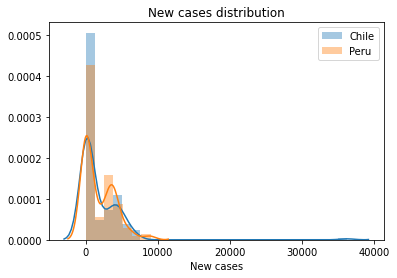

In [ ]:
# Defining variables of interest: Countries and Variables (Activos?)

countries = ['US', 'Argentina', 'Brazil', 'Chile', 'Colombia','Ecuador', 'Paraguay', 'Peru', 'Uruguay' ]
var=['New cases', 'New deaths']

# Peru vs Chile
plt.title('New cases distribution')
country = [countries[3]]
selected_country = full_grouped[full_grouped['Country/Region'].isin(country)]
sns.distplot(selected_country[var[0]].dropna(), label=countries[3])

country = [countries[7]]
selected_country = full_grouped[full_grouped['Country/Region'].isin(country)]
sns.distplot(selected_country[var[0]].dropna(), label=countries[7], kde=True, norm_hist=True)
plt.legend()

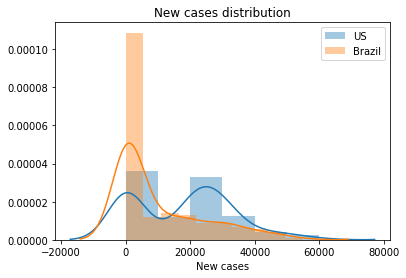

In [ ]:
# US vs Brazil
plt.title('New cases distribution')
country = [countries[0]]
selected_country = full_grouped[full_grouped['Country/Region'].isin(country)]
sns.distplot(selected_country[var[0]].dropna(), label=countries[0])

country = [countries[2]]
selected_country = full_grouped[full_grouped['Country/Region'].isin(country)]
sns.distplot(selected_country[var[0]].dropna(), label=countries[2], kde=True, norm_hist=True)
plt.legend()

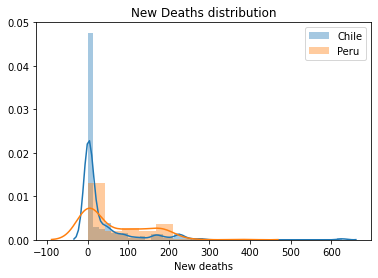

In [ ]:
# Peru vs Chile
plt.title('New Deaths distribution')
country = [countries[3]]
selected_country = full_grouped[full_grouped['Country/Region'].isin(country)]
sns.distplot(selected_country[var[1]].dropna(), label=countries[3])

country = [countries[7]]
selected_country = full_grouped[full_grouped['Country/Region'].isin(country)]
sns.distplot(selected_country[var[1]].dropna(), label=countries[7], kde=True, norm_hist=True)
plt.legend()

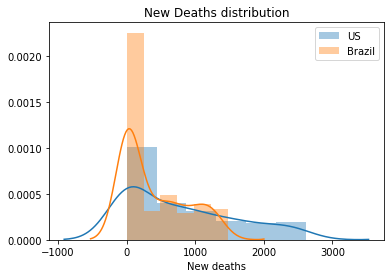

In [ ]:
# US vs Brazil
plt.title('New Deaths distribution')
country = [countries[0]]
selected_country = full_grouped[full_grouped['Country/Region'].isin(country)]
sns.distplot(selected_country[var[1]].dropna(), label=countries[0])

country = [countries[2]]
selected_country = full_grouped[full_grouped['Country/Region'].isin(country)]
sns.distplot(selected_country[var[1]].dropna(), label=countries[2], kde=True, norm_hist=True)
plt.legend()

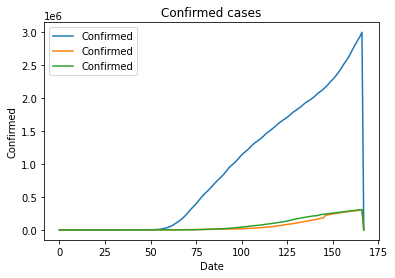

In [ ]:
countries = ['US', 'Argentina', 'Brazil', 'Chile', 'Colombia','Ecuador', 'Paraguay', 'Peru', 'Uruguay' ]

country = [countries[0]]
selected_country = full_grouped[full_grouped['Country/Region'].isin(country)]
selected_country = selected_country.reset_index()
selected_country['Confirmed'].plot()

country = [countries[3]]
selected_country = full_grouped[full_grouped['Country/Region'].isin(country)]
#selected_country =selected_country.iloc[-1,:]
selected_country = selected_country.reset_index()
selected_country['Confirmed'].plot()

country = [countries[7]]
selected_country = full_grouped[full_grouped['Country/Region'].isin(country)]
selected_country = selected_country.reset_index()
selected_country['Confirmed'].plot()

plt.title('Confirmed cases')
plt.ylabel('Confirmed')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
fig = px.scatter_geo(full_grouped, lat=full_grouped.columns[3], lon=full_grouped.columns[4], 
                     color= full_grouped.columns[5], text=full_grouped.columns[2],
                     hover_name=full_grouped.columns[2], size=full_grouped.columns[5],
                     #animation_frame=full_grouped.columns[5],
                     animation_group=full_grouped.columns[5],
                     projection='natural earth',
                     title='Confirmed cases along the world')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# For three map, do we need continents or regions? It did not worked repeating the last one procedure